
TimeStamps in which Anomalies detected in A201-BCP001-BIO0001-TT00026.BIO-BIO-TEM-CTR using Isolation Forest:
 - 2025-06-17 23:30:00 ; 37.06
 - 2025-06-18 00:00:00 ; 36.82
 - 2025-06-18 08:30:00 ; 37.04
 - 2025-06-23 11:30:00 ; 31.6
 - 2025-06-23 12:00:00 ; 35.38
 - 2025-06-23 12:30:00 ; 37.75
 - 2025-06-23 13:00:00 ; 36.54
 - 2025-06-23 13:30:00 ; 36.56
 - 2025-06-23 14:00:00 ; 36.77
 - 2025-06-25 22:30:00 ; 36.98
 - 2025-06-29 11:00:00 ; 37.03
 - 2025-06-29 16:00:00 ; 37.06
 - 2025-06-30 02:00:00 ; 37.01
 - 2025-06-30 04:00:00 ; 37.18
 - 2025-06-30 09:00:00 ; 36.95
 - 2025-06-30 10:30:00 ; 36.93
 - 2025-06-30 11:00:00 ; 36.85
 - 2025-06-30 13:30:00 ; 37.05
 - 2025-06-30 14:00:00 ; 37.02
 - 2025-06-30 14:30:00 ; 36.98
 - 2025-06-30 15:00:00 ; 37.0
 - 2025-06-30 15:30:00 ; 36.96
 - 2025-06-30 16:00:00 ; 37.07
 - 2025-06-30 16:30:00 ; 36.99
 - 2025-06-30 17:00:00 ; 37.0
 - 2025-06-30 17:30:00 ; 37.0
 - 2025-06-30 18:00:00 ; 36.97
 - 2025-06-30 19:30:00 ; 36.17
 - 2025-06-30 20:00:00 ; 

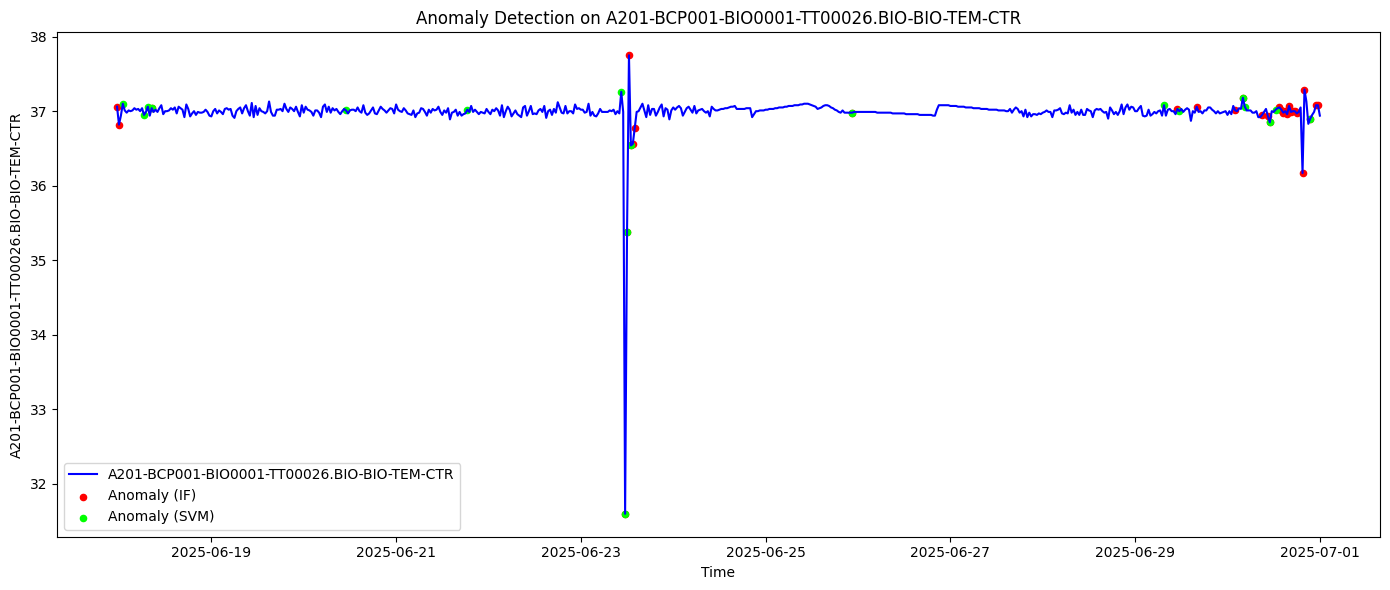

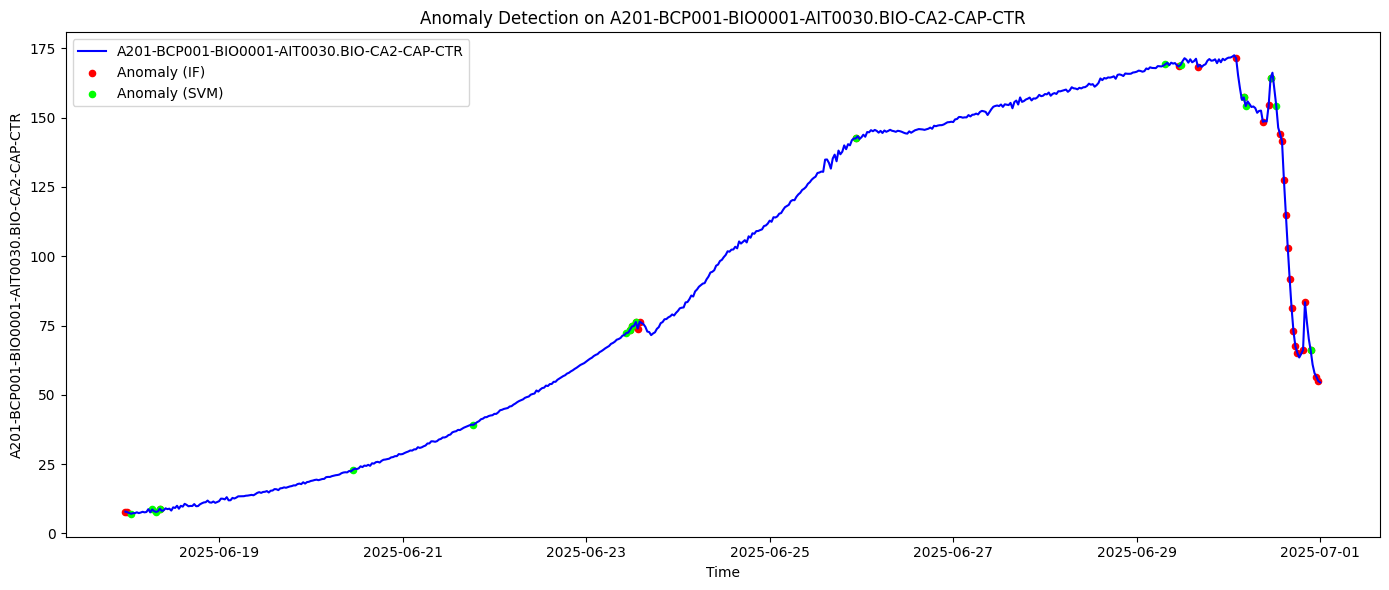

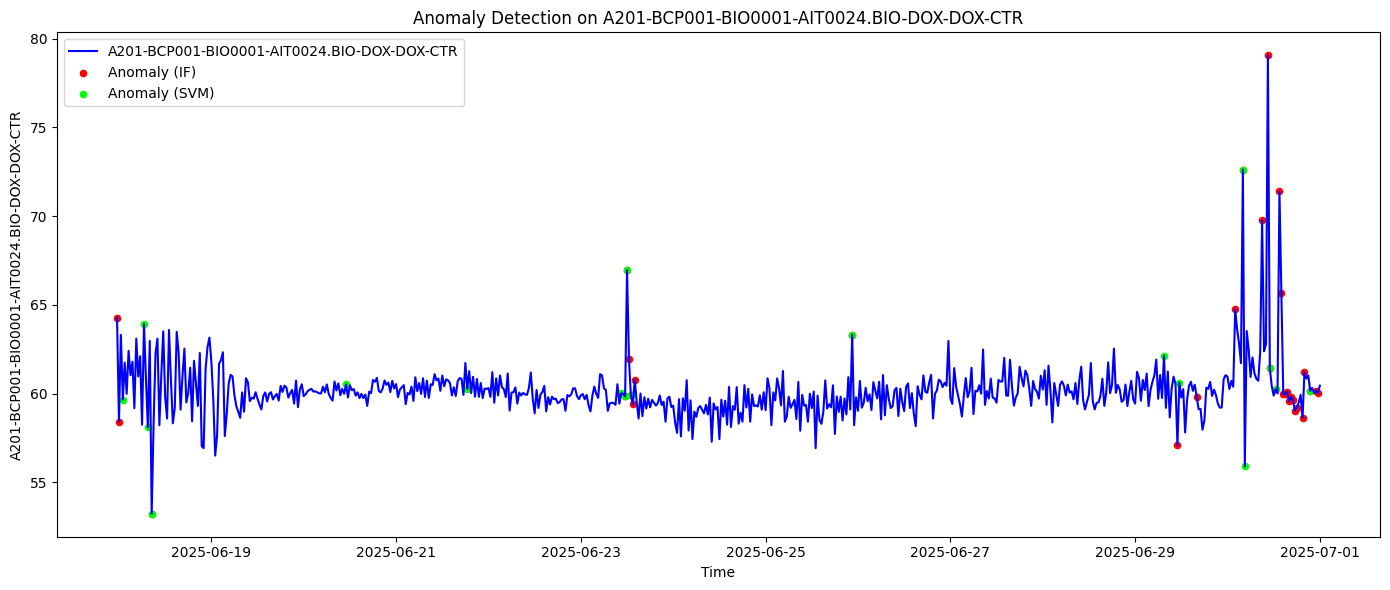

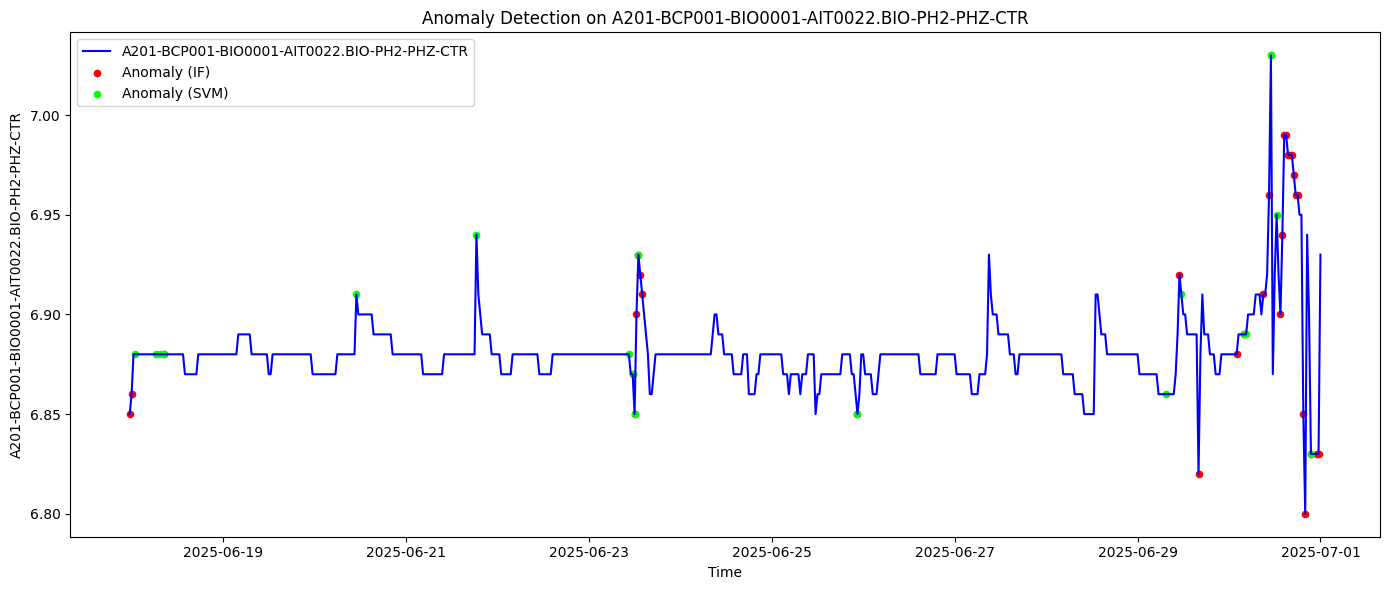

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\U1078446\Downloads\Processed_Data07242025041326PM0857DB658E8D1D2A.csv"
df = pd.read_csv(file_path)

# Parse the time column and set it as index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df.sort_index(inplace=True)

# Select only numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Standardize the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_features])

# Fit models
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['IF_Anomaly'] = iso_forest.fit_predict(scaled_features)

oc_svm = OneClassSVM(nu=0.01, kernel="rbf", gamma='scale')
df['SVM_Anomaly'] = oc_svm.fit_predict(scaled_features)

# Function to print anomalies
def print_anomalies(df, feature, method_col, method_name):
    print(f"\nTimeStamps in which Anomalies detected in {feature} using {method_name}:")
    anomalies = df[df[method_col] == -1][feature]
    if anomalies.empty:
        print("No anomalies detected.")
    else:
        for ts, val in anomalies.items():
            print(f" - {ts} ; {val}")

# Print anomalies for each numeric feature and method
for feature in numeric_features:
    print_anomalies(df, feature, 'IF_Anomaly', 'Isolation Forest')
    print_anomalies(df, feature, 'SVM_Anomaly', 'One-Class SVM')

# Plotting
for feature in numeric_features:
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[feature], label=feature, color='blue')
    plt.scatter(df.index[df['IF_Anomaly'] == -1], df[feature][df['IF_Anomaly'] == -1],
                color='red', label='Anomaly (IF)', s=20)
    plt.scatter(df.index[df['SVM_Anomaly'] == -1], df[feature][df['SVM_Anomaly'] == -1],
                color='lime', label='Anomaly (SVM)', s=20)
    plt.title(f'Anomaly Detection on {feature}')
    plt.xlabel('Time')
    plt.ylabel(feature)
    plt.legend()
    plt.tight_layout()
    plt.show()


Features being analyzed: ['A201-BCP001-BIO0001-TT00026.BIO-BIO-TEM-CTR', 'A201-BCP001-BIO0001-AIT0030.BIO-CA2-CAP-CTR', 'A201-BCP001-BIO0001-AIT0024.BIO-DOX-DOX-CTR', 'A201-BCP001-BIO0001-AIT0022.BIO-PH2-PHZ-CTR']

TESTING WITH STANDARD SCALER
Tuning Isolation Forest...
Best IF params: {'contamination': 0.01, 'max_features': 0.8, 'max_samples': 0.5, 'n_estimators': 200}, Score: 0.7660
Tuning One-Class SVM...
Best SVM params: {'gamma': 0.001, 'kernel': 'rbf', 'nu': 0.01}, Score: 0.7912

TESTING WITH ROBUST SCALER
Tuning Isolation Forest...
Best IF params: {'contamination': 0.01, 'max_features': 0.8, 'max_samples': 0.5, 'n_estimators': 200}, Score: 0.8671
Tuning One-Class SVM...
Best SVM params: {'gamma': 0.001, 'kernel': 'poly', 'nu': 0.05}, Score: 0.8942

EVALUATION SUMMARY

STANDARD SCALER:
  IF_pred        :    7 anomalies (1.13%)
  SVM_pred       :    4 anomalies (0.65%)
  Ensemble_pred  :    7 anomalies (1.13%)

ROBUST SCALER:
  IF_pred        :    7 anomalies (1.13%)
  SVM_pred   

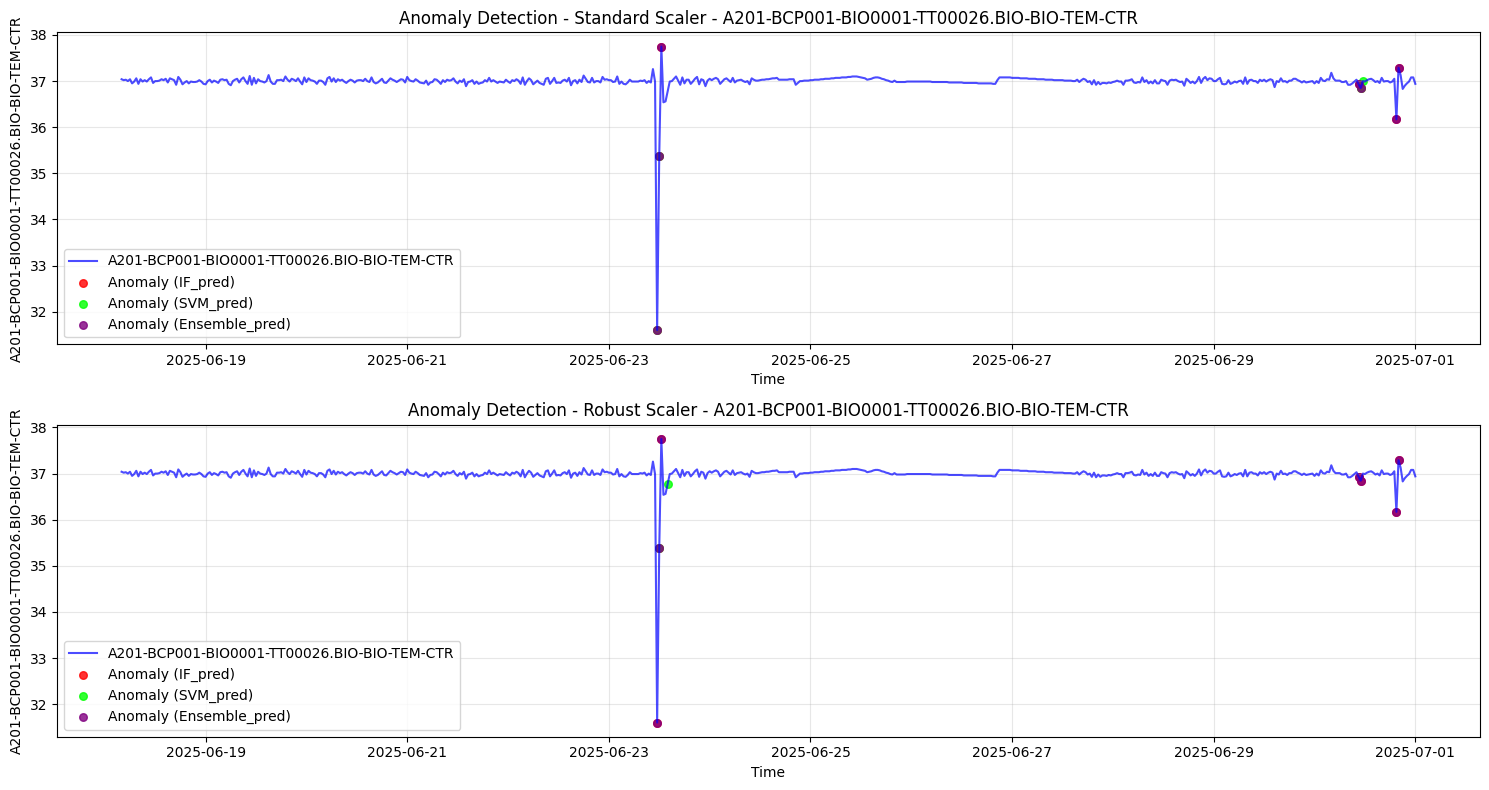


DETAILED ANOMALY ANALYSIS

Ensemble method detected 7 anomalies:

Top anomalous timestamps:
 1. 2025-06-23 11:30:00 - {'A201-BCP001-BIO0001-TT00026.BIO-BIO-TEM-CTR': 31.6, 'A201-BCP001-BIO0001-AIT0030.BIO-CA2-CAP-CTR': 73.54, 'A201-BCP001-BIO0001-AIT0024.BIO-DOX-DOX-CTR': 59.84, 'A201-BCP001-BIO0001-AIT0022.BIO-PH2-PHZ-CTR': 6.87}
 2. 2025-06-23 12:00:00 - {'A201-BCP001-BIO0001-TT00026.BIO-BIO-TEM-CTR': 35.38, 'A201-BCP001-BIO0001-AIT0030.BIO-CA2-CAP-CTR': 74.65, 'A201-BCP001-BIO0001-AIT0024.BIO-DOX-DOX-CTR': 66.96, 'A201-BCP001-BIO0001-AIT0022.BIO-PH2-PHZ-CTR': 6.85}
 3. 2025-06-23 12:30:00 - {'A201-BCP001-BIO0001-TT00026.BIO-BIO-TEM-CTR': 37.75, 'A201-BCP001-BIO0001-AIT0030.BIO-CA2-CAP-CTR': 74.83, 'A201-BCP001-BIO0001-AIT0024.BIO-DOX-DOX-CTR': 61.94, 'A201-BCP001-BIO0001-AIT0022.BIO-PH2-PHZ-CTR': 6.9}
 4. 2025-06-30 10:30:00 - {'A201-BCP001-BIO0001-TT00026.BIO-BIO-TEM-CTR': 36.93, 'A201-BCP001-BIO0001-AIT0030.BIO-CA2-CAP-CTR': 154.35, 'A201-BCP001-BIO0001-AIT0024.BIO-DOX-DOX-CTR': 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = r"C:\Users\U1078446\Downloads\Processed_Data07242025041326PM0857DB658E8D1D2A.csv"
df = pd.read_csv(file_path)

# Parse the time column and set it as index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df.sort_index(inplace=True)

# Select only numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Features being analyzed: {numeric_features}")

# 1. FEATURE ENGINEERING & PREPROCESSING
# Add rolling statistics as features
window_size = 10
for feature in numeric_features:
    df[f'{feature}_rolling_mean'] = df[feature].rolling(window=window_size).mean()
    df[f'{feature}_rolling_std'] = df[feature].rolling(window=window_size).std()
    df[f'{feature}_diff'] = df[feature].diff()

# Drop NaN values created by rolling window
df.dropna(inplace=True)

# Get all engineered features
all_features = [col for col in df.columns if col not in ['IF_Anomaly', 'SVM_Anomaly']]

# 2. ADVANCED SCALING OPTIONS
scalers = {
    'standard': StandardScaler(),
    'robust': RobustScaler(),  # Less sensitive to outliers
}

# 3. HYPERPARAMETER TUNING FUNCTIONS
def tune_isolation_forest(X, contamination_range=[0.01, 0.05, 0.1, 0.15]):
    """Tune Isolation Forest parameters"""
    best_score = -np.inf
    best_params = {}
    best_model = None
    
    param_grid = {
        'contamination': contamination_range,
        'n_estimators': [100, 200, 300],
        'max_samples': ['auto', 0.5, 0.8],
        'max_features': [1.0, 0.8, 0.5]
    }
    
    print("Tuning Isolation Forest...")
    for params in ParameterGrid(param_grid):
        try:
            model = IsolationForest(random_state=42, **params)
            predictions = model.fit_predict(X)
            
            # Use silhouette score as evaluation metric
            if len(set(predictions)) > 1:  # Need at least 2 clusters
                score = silhouette_score(X, predictions)
                if score > best_score:
                    best_score = score
                    best_params = params
                    best_model = model
        except:
            continue
    
    print(f"Best IF params: {best_params}, Score: {best_score:.4f}")
    return best_model, best_params

def tune_one_class_svm(X, nu_range=[0.01, 0.05, 0.1, 0.15]):
    """Tune One-Class SVM parameters"""
    best_score = -np.inf
    best_params = {}
    best_model = None
    
    param_grid = {
        'nu': nu_range,
        'kernel': ['rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1.0]
    }
    
    print("Tuning One-Class SVM...")
    for params in ParameterGrid(param_grid):
        try:
            model = OneClassSVM(**params)
            predictions = model.fit_predict(X)
            
            if len(set(predictions)) > 1:
                score = silhouette_score(X, predictions)
                if score > best_score:
                    best_score = score
                    best_params = params
                    best_model = model
        except:
            continue
    
    print(f"Best SVM params: {best_params}, Score: {best_score:.4f}")
    return best_model, best_params

# 4. DIMENSIONALITY REDUCTION (Optional)
def apply_pca(X, variance_threshold=0.95):
    """Apply PCA to reduce dimensionality"""
    pca = PCA()
    pca.fit(X)
    
    # Find number of components for desired variance
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumsum >= variance_threshold) + 1
    
    pca_reduced = PCA(n_components=n_components)
    X_reduced = pca_reduced.fit_transform(X)
    
    print(f"PCA: Reduced from {X.shape[1]} to {n_components} features "
          f"({variance_threshold*100}% variance retained)")
    
    return X_reduced, pca_reduced

# 5. ENSEMBLE APPROACH
def ensemble_predictions(predictions_list, weights=None):
    """Combine multiple model predictions"""
    if weights is None:
        weights = [1/len(predictions_list)] * len(predictions_list)
    
    # Convert -1/1 to 0/1 for averaging
    binary_preds = [(pred + 1) / 2 for pred in predictions_list]
    weighted_avg = np.average(binary_preds, axis=0, weights=weights)
    
    # Convert back to -1/1 (threshold at 0.5)
    ensemble_pred = np.where(weighted_avg > 0.5, 1, -1)
    return ensemble_pred

# 6. MAIN EXECUTION
results = {}

for scaler_name, scaler in scalers.items():
    print(f"\n{'='*50}")
    print(f"TESTING WITH {scaler_name.upper()} SCALER")
    print(f"{'='*50}")
    
    # Scale features
    scaled_features = scaler.fit_transform(df[all_features])
    
    # Optional: Apply PCA
    # scaled_features, pca = apply_pca(scaled_features, variance_threshold=0.95)
    
    # Tune models
    best_if, if_params = tune_isolation_forest(scaled_features)
    best_svm, svm_params = tune_one_class_svm(scaled_features)
    
    # Get predictions
    if_pred = best_if.predict(scaled_features)
    svm_pred = best_svm.predict(scaled_features)
    
    # Ensemble prediction
    ensemble_pred = ensemble_predictions([if_pred, svm_pred], weights=[0.6, 0.4])
    
    # Store results
    results[scaler_name] = {
        'IF_pred': if_pred,
        'SVM_pred': svm_pred,
        'Ensemble_pred': ensemble_pred,
        'IF_params': if_params,
        'SVM_params': svm_params
    }

# 7. EVALUATION AND COMPARISON
def evaluate_predictions(predictions_dict):
    """Evaluate different prediction methods"""
    print("\n" + "="*60)
    print("EVALUATION SUMMARY")
    print("="*60)
    
    for scaler_name, preds in predictions_dict.items():
        print(f"\n{scaler_name.upper()} SCALER:")
        
        for method, pred in preds.items():
            if method.endswith('_pred'):
                anomaly_count = np.sum(pred == -1)
                anomaly_rate = anomaly_count / len(pred) * 100
                print(f"  {method:15}: {anomaly_count:4d} anomalies ({anomaly_rate:.2f}%)")

evaluate_predictions(results)

# 8. ADVANCED VISUALIZATION
def plot_advanced_results(df, results, feature_to_plot=None):
    """Create advanced plots with multiple detection methods"""
    if feature_to_plot is None:
        feature_to_plot = numeric_features[0]  # Plot first numeric feature
    
    fig, axes = plt.subplots(len(results), 1, figsize=(15, 4*len(results)))
    if len(results) == 1:
        axes = [axes]
    
    colors = {'IF_pred': 'red', 'SVM_pred': 'lime', 'Ensemble_pred': 'purple'}
    
    for idx, (scaler_name, preds) in enumerate(results.items()):
        ax = axes[idx]
        
        # Plot the feature
        ax.plot(df.index, df[feature_to_plot], label=feature_to_plot, color='blue', alpha=0.7)
        
        # Plot anomalies for each method
        for method, pred in preds.items():
            if method.endswith('_pred'):
                anomaly_mask = pred == -1
                ax.scatter(df.index[anomaly_mask], df[feature_to_plot][anomaly_mask],
                          color=colors[method], label=f'Anomaly ({method})', s=30, alpha=0.8)
        
        ax.set_title(f'Anomaly Detection - {scaler_name.title()} Scaler - {feature_to_plot}')
        ax.set_xlabel('Time')
        ax.set_ylabel(feature_to_plot)
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot results for the first numeric feature
if numeric_features:
    plot_advanced_results(df, results, numeric_features[0])

# 9. DETAILED ANOMALY ANALYSIS
def analyze_anomalies(df, results, top_features=3):
    """Analyze which features contribute most to anomalies"""
    print("\n" + "="*60)
    print("DETAILED ANOMALY ANALYSIS")
    print("="*60)
    
    # Use the best performing scaler (you can modify this logic)
    best_scaler = list(results.keys())[0]  # For now, use first one
    best_results = results[best_scaler]
    
    # Analyze ensemble predictions
    ensemble_anomalies = best_results['Ensemble_pred'] == -1
    
    if np.sum(ensemble_anomalies) > 0:
        print(f"\nEnsemble method detected {np.sum(ensemble_anomalies)} anomalies:")
        anomaly_data = df[ensemble_anomalies][numeric_features]
        
        print("\nTop anomalous timestamps:")
        for i, (ts, row) in enumerate(anomaly_data.head(10).iterrows()):
            print(f"{i+1:2d}. {ts} - {row.to_dict()}")
    
    return ensemble_anomalies

# Run detailed analysis
anomaly_mask = analyze_anomalies(df, results)

print("\n" + "="*60)
print("TUNING COMPLETE!")
print("="*60)
print("\nKey improvements made:")
print("1. ✅ Hyperparameter tuning for both models")
print("2. ✅ Multiple scaling methods tested")  
print("3. ✅ Feature engineering (rolling stats, differences)")
print("4. ✅ Ensemble method combining both models")
print("5. ✅ Comprehensive evaluation and visualization")
print("6. ✅ Detailed anomaly analysis")